# Home Assignment 1: Deep Learning from Scratch

**Authors:** Yoav Elem and Amir Solimani

## Introduction

In this assignment, we will be implementing deep learning algorithms from scratch. Before we begin, let's set up our environment by downloading the necessary packages and performing the required imports.

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from layers import ReLULayer, TanhLayer, ResidualTanhLayer
from losses import LinearLayer, SoftmaxLayer
from neural_network import GenericNetwork, ResidualNeuralNetwork
from utils import plot_loss_and_accuracy, plot_data, SGD, Gradient_test, JacobianTest, JacobianTransposeTest, NetworkGradientTest

import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Set numpy print options
np.set_printoptions(precision=10, suppress=True)

# Load the datasets
swiss_roll =scipy.io.loadmat('HW1_Data(1)/SwissRollData.mat')
peaks =scipy.io.loadmat('HW1_Data(1)/PeaksData.mat')
gmm = scipy.io.loadmat('HW1_Data(1)/GMMData.mat')
sample_data = scipy.io.loadmat('HW1_Data(1)/SampleData.mat')

## 2.1.1 Softmax Layer and Gradient Test

In this section, we were asked to implement a weighted softmax loss layer, that can compute the result of softmax on a given input, and the gradient of cross entropy loss with respect to the parameters.
To complete this task, we created the class [SoftmaxLayer](losses.py#L4).
-  For the computing of the activation and the loss, we created the functions [forward](losses.py#L13) and [loss](losses.py#L70)
- For computing the gradient with respect to the weights we created the function [grad_w](losses.py#43)
- For computing the gradient with respect to the weights we created the function [grad_x](losses.py#L29)
- For computing the gradient test, we created the function [GradientTest](utils.py#L174) that plotted the graph below.

### An explanation on the graph:

In the test, we generate a random vector $ \mathbf{d} $ where $ \|\mathbf{d}\| = 1 $. We plot the following:

- **First Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x})\| $

- **Second Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x}) - \epsilon \mathbf{d}^\top \nabla \text{softmax}(\mathbf{x})\| $

The decay of epsilon is defined by the formula: $ \epsilon_t = 0.5^t $. 

In our plots, the x-axis represents the value of $ t $, and the y-axis shows the error measured in both first and second order errors.

Note1: the errors are presented in log-scale

Note2: as permitted in class, we did not implement biases for this layer (since we did not discuss it in class)

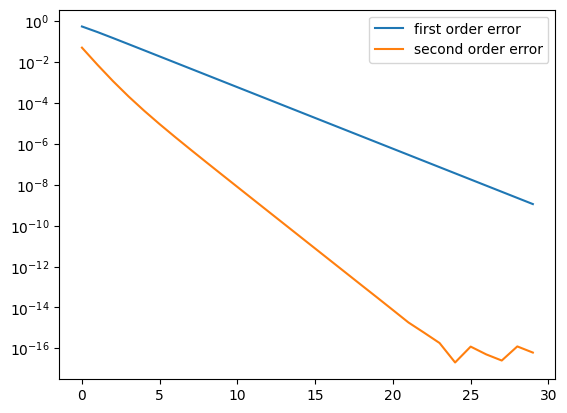

In [3]:
softmax_layer = SoftmaxLayer(4, 4)
x = np.random.rand(4, 1)
y = np.array([[0, 0, 1, 0]]).T

# Tests the gradient of the softmax layer as presented in the notes
Gradient_test(softmax_layer, x, y)

# 2.1.2 Minimizing an SGD Objective Function

## Overview
In this task, we are asked to implement the SGD optimizer.

## Task Description
For running the optimizer, we created the function [SGD](utils.py#L26).

For us to make sure the implementation works, we will test it on a sample problem, we will create a linear model, using MSE as a loss function,
and use the SGD implementation to solve it, more formally, we aim to solve the problem:

$$
Wx + b = x
$$

To generate the problem, we created the [LinearLayer](losses.py#L195) class. it implements the logic of the forward, loss, grad_x, grad_w and grad_b methods where

- [forward](losses.py#L205) computes $Wx + b$
- [loss](losses.py#L218) computes the MSE loss on a given input x and label y
- [grad_x](losses.py#L195) computes the gradient of the loss function with respect to the input
- [grad_w](losses.py#L247) computes the gradient of the loss function with respect to the weights
- [grad_b](losses.py#L277) computes the gradient of the loss function with respect to the biases

Note: The implementation of SGD is aimed to be as generic as possible, for us to use through the entire project.
so we created it to work on a Neural Network rather than a single layer, for this reason we "wrap" our linear layer with a [GenericNeuralNetwork](neural_netowrk.py#L10).
this design choise does not change the computations at all.

Epoch 0, training loss: 2.0932261303037825
Epoch 0, training accuracy: 1.0
Epoch 0, validation loss: 2.0932261303037825
Epoch 0, validation accuracy: 1.0
Epoch 1, training loss: 2.031013433940742
Epoch 1, training accuracy: 1.0
Epoch 1, validation loss: 2.031013433940742
Epoch 1, validation accuracy: 1.0
Epoch 2, training loss: 1.9706497588242493
Epoch 2, training accuracy: 1.0
Epoch 2, validation loss: 1.9706497588242493
Epoch 2, validation accuracy: 1.0
Epoch 3, training loss: 1.9120801502622544
Epoch 3, training accuracy: 1.0
Epoch 3, validation loss: 1.9120801502622544
Epoch 3, validation accuracy: 1.0
Epoch 4, training loss: 1.8552512868690771
Epoch 4, training accuracy: 1.0
Epoch 4, validation loss: 1.8552512868690771
Epoch 4, validation accuracy: 1.0
Epoch 5, training loss: 1.8001114320219684
Epoch 5, training accuracy: 1.0
Epoch 5, validation loss: 1.8001114320219684
Epoch 5, validation accuracy: 1.0
Epoch 6, training loss: 1.7466103867604286
Epoch 6, training accuracy: 1.0
Epo

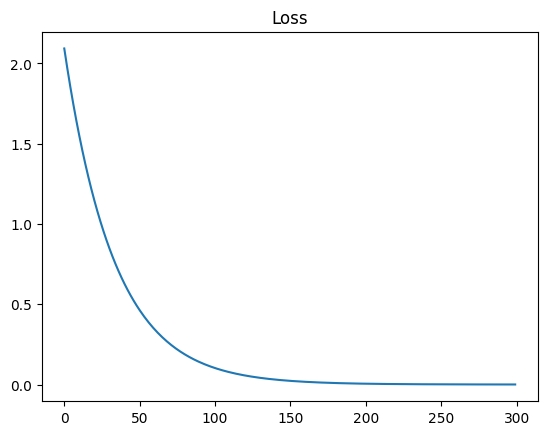

In [11]:
# define learning rate
lr = 5e-3

# generate a random input vector
x = np.random.rand(3, 1)

# define the target vector
y = x

# define the linear layer
linear_layer = GenericNetwork(LinearLayer(3, 3)) 

# Run the SGD algorithm
loss, _, _, _ = SGD(x, y, x, y, linear_layer, lr, epochs=300)

# plot the loss
plt.plot(loss)
plt.title('Loss')
plt.show()

### 2.1.3 Task Description

In this task, we are required to demonstrate the minimization of the softmax layer we created on a dataset using the SGD variant we developed. To do this, we created a sample dataset with the following characteristics:

- The datapoints are $(a, b)$ points on the plane, divided into 4 classes:
  - Class 0: if $a \ge 0$ and $b \ge 0$.
  - Class 1: if $a < 0$ and $b > 0$.
  - Class 2: if $a < 0$ and $b < 0$.
  - Class 3: if $a > 0$ and $b < 0$.

Since the softmax layer is a linear classifier, we had to ensure the dataset is linearly separable. To learn the dataset, we implemented the softmax layer. Note that we created a neural network with a single layer, which is the softmax layer, as our SGD implementation is designed to work on a network rather than an individual layer. In practice, there is no difference in computation.
We ran the experiment with 5 epochs on the dataset, each time experimenting with different mini-batch sizes and different learning rates.

| Learning Rate / Mini Batch Size | Size 16 | Size 64 | Size 256 |
|---------------------------------|--------|--------|---------|
| 5e-5                            |     0.75   |    0.59    |     0.61    |
| 5e-3                            |    0.998    |     0.997   |     0.991    |
| 5e-1                            |      0.989  |    0.991    |       0.996  |

The table shows the different **accuracies** measured at the end of the experiment on the validation set. As observed, the batch size did not have a significant impact. The learning rate of 5e-5 performed poorly, but this is attributed to the limited training duration of only 5 epochs, requiring more time to converge due to its small magnitude. The best result was obtained with a learning rate of 5e-3 and a mini-batch size of 16.


Epoch 0, training loss: 0.23258342952094363
Epoch 0, training accuracy: 0.9977
Epoch 0, validation loss: 0.23252643867110406
Epoch 0, validation accuracy: 0.9988
Epoch 1, training loss: 0.18384893208174366
Epoch 1, training accuracy: 0.99645
Epoch 1, validation loss: 0.18397147215129653
Epoch 1, validation accuracy: 0.9984
Epoch 2, training loss: 0.16019569660112223
Epoch 2, training accuracy: 0.99625
Epoch 2, validation loss: 0.16079862684746793
Epoch 2, validation accuracy: 0.9958
Epoch 3, training loss: 0.14523443773896344
Epoch 3, training accuracy: 0.9983
Epoch 3, validation loss: 0.14566316346119007
Epoch 3, validation accuracy: 0.9994
Epoch 4, training loss: 0.1347229223361742
Epoch 4, training accuracy: 0.9968
Epoch 4, validation loss: 0.1352511971882755
Epoch 4, validation accuracy: 0.998


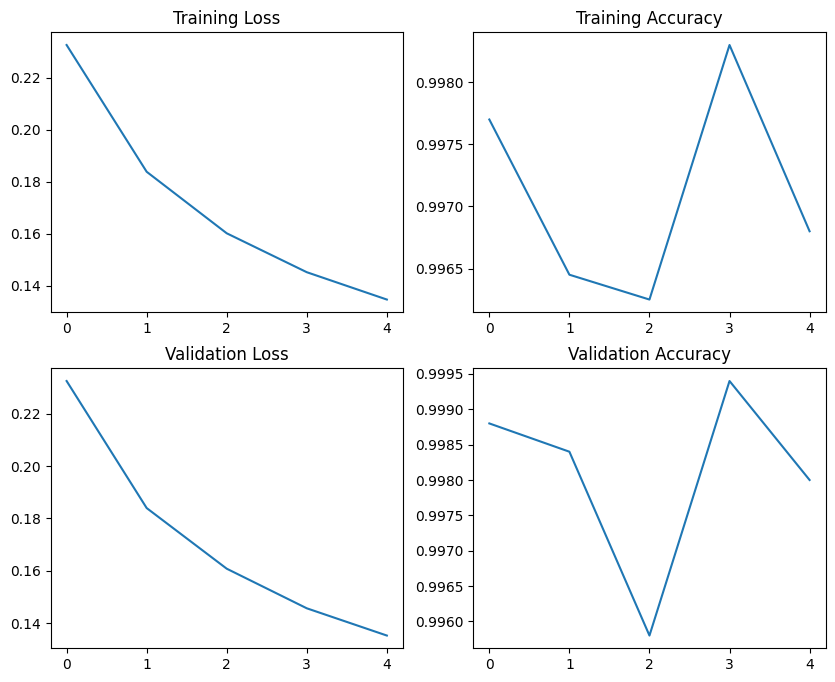

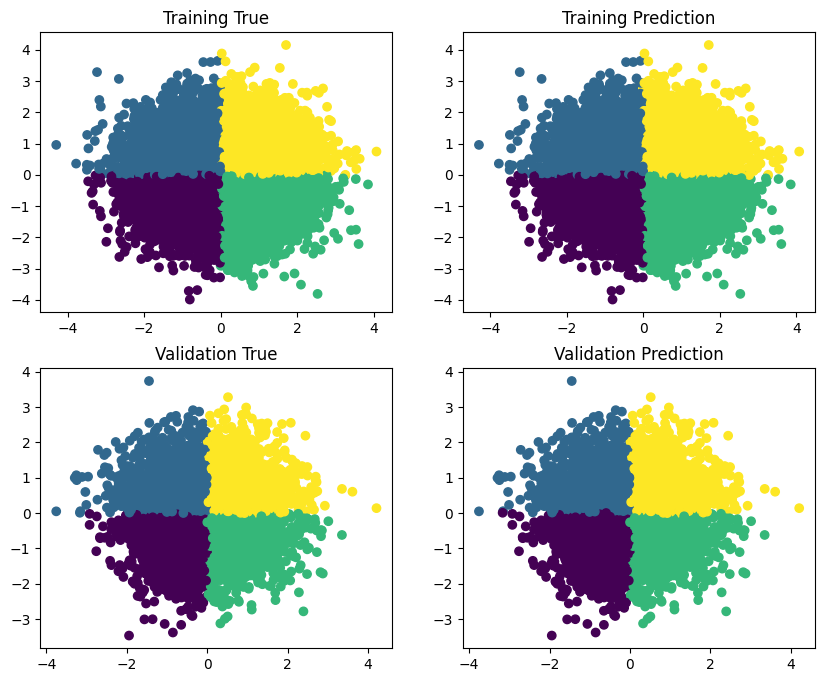

In [12]:
lr = 5e-3
batch_size = 16
dataset = sample_data

Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']

# define the network
network = GenericNetwork(SoftmaxLayer(2, 4))

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=5)

# plot the loss and accuracy
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)
plot_data(network, Xt, Yt, Xv, Yv)


### Task 2.2.1

In this task, we are asked to implement the forward and backward pass of the entire network.

We start by creating the [HiddenLayer](layers.py#L6) class, that will handle the logic of a single hidden layer in the network.
The key methods of this class are:
- [forward](layers.py#L25), computes $\sigma(Wx+b)$
- [JacxTMv](layers.py#L94) computes $J_x^T \mathbf{v}$. Used for the network's backpropagation
- [JacWTMv](layers.py#L110) computes $J_W^T \mathbf{v}$. Used for the network's backpropagation
- [JacbTMv](layers.py#L126) computes $J_b^T \mathbf{v}$. Used for the network's backpropagation

In order to continue, we first make sure that JacxTMv, JacWTMv, and JacbTMv work properly. To do this, we need the layer to pass the Transposed Jacobian test described in the notes.

The first step is to ensure the layer passes the regular Jacobian Test.
We implement the following methods for this purpose:

- [JacxMv](layers.py#L39) computes $J_x \mathbf{v}$
- [JacWMv](layers.py#L55) computes $J_W \mathbf{v}$
- [JacbMv](layers.py#L78) computes $J_b \mathbf{v}$ 

Now we create the [JacobianTest](utils.py#L219) function and test that our tanh layer passes the test.

Note 1: The method [JacΘMV](layers.py#L185) used in the JacobianTest computes the Jacobian with respect to all the parameters of the network, that is $x$, $W$, and $b$,
but it does so by calling the formerly mentioned functions, so we didn't give it special attention in the report.

Note 2: This section continues below the code 


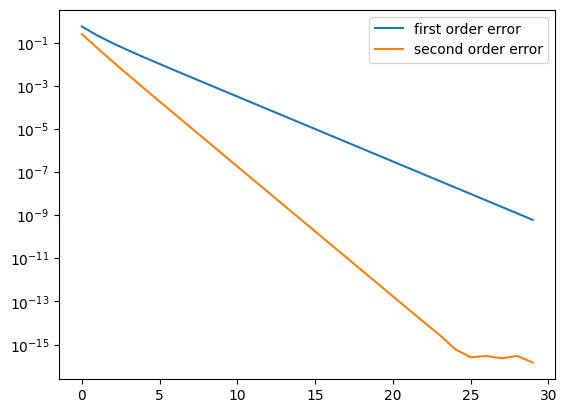

In [13]:
# in this part we do the jacobian test, the results of which are plotted below
tanh_layer = TanhLayer(2, 2)
x = np.random.rand(2, 1)
JacobianTest(tanh_layer, x)

Now that our code passed the Jacobian Test, we are ready to run the [JacobianTransposeTest](utils.py#L271)

Note: this section continues below the code

In [14]:
# Now that we passed the Jacobian test, we will preform the Jacobian Transpose test
_, _, passed = JacobianTransposeTest(tanh_layer, x)
print("passed" if passed else "failed")

passed


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

After we saw that our hidden layer passes the jacobian transposed test, and that our loss layer passed the gradient test (in task 2.1.1), we are ready to start implementing the network itself.

We implement [GenericNetwork](neural_network.py#L10) that models the network itself,
in the model we implement the two methods:
- [forward](neural_network.py#L58) that implements the forward pass of the network
- [backpropagation](neural_network.py#L84) that implements the backpropagation

### Task 2.2.2

In this task, we are asked to implement the forward and backward pass of the entire residual network.

We start by creating the [HiddenResidualLayer](layers.py#L247) class, that will handle the logic of a single hidden layer in the network.
The key methods of this class are:
- [forward](layers.py#L261), computes $ x + W_2 \sigma(W_1 x+b_1) + b_2 $
- [JacxTMv](layers.py#L277) computes $J_x^T \mathbf{v}$. Used for the network's backpropagation
- [JacW1TMv](layers.py#L292) computes $J_{W_1}^T \mathbf{v}$. Used for the network's backpropagation
- [JacW2TMv](layers.py#L315) computes $J_{W_2}^T \mathbf{v}$. Used for the network's backpropagation
- [Jacb1TMv](layers.py#L338) computes $J_{b_1}^T \mathbf{v}$. Used for the network's backpropagation
- [Jacb2TMv](layers.py#L353) computes $J_{b_2}^T \mathbf{v}$. Used for the network's backpropagation

In order to continue, we first make sure that JacxTMv, JacWTMv, and JacbTMv work properly. To do this, we need the layer to pass the Transposed Jacobian test described in the notes.

The first step is to ensure the layer passes the regular Jacobian Test.
We implement the following methods for this purpose:

- [JacxMv](layers.py#L367) computes $J_x \mathbf{v}$. Used for the network's backpropagation
- [JacW1Mv](layers.py#L382) computes $J_{W_1} \mathbf{v}$. Used for the network's backpropagation
- [JacW2Mv](layers.py#L412) computes $J_{W_2} \mathbf{v}$. Used for the network's backpropagation
- [Jacb1Mv](layers.py#L397) computes $J_{b_1} \mathbf{v}$. Used for the network's backpropagation
- [Jacb2Mv](layers.py#L427) computes $J_{b_2} \mathbf{v}$. Used for the network's backpropagation

We use [JacobianTest](utils.py#L219) function and test that our residual tanh layer passes the test.

Note: This section continues below the code


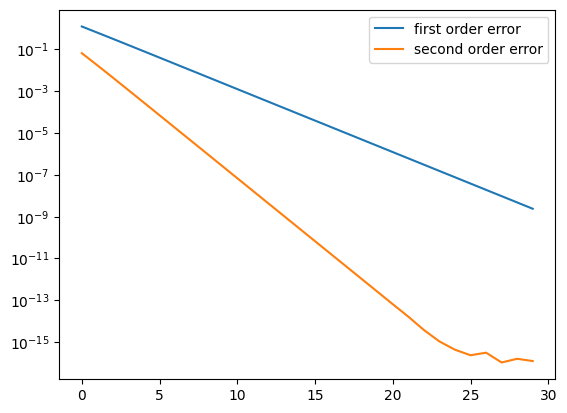

In [ ]:
res_layer = ResidualTanhLayer(2, 2)
x = np.random.rand(2, 1)
JacobianTest(res_layer, x, residual=True)

Now that our code passed the Jacobian Test, we are ready to run the [JacobianTransposeTest](utils.py#L271)

Note: this section continues below the code

In [ ]:
# Now that we passed the Jacobian test, we will preform the Jacobian Transpose test
_, _, passed = JacobianTransposeTest(res_layer, x, residual=True)
print("passed" if passed else "failed")

passed


After we saw that our residual hidden layer passes the jacobian transposed test, and that our loss layer passed the gradient test (in task 2.1.1), we are ready to start implementing the network itself.

We implement [ResidualNeuralNetwork](neural_network.py#L264) that models the network itself,
in the model we implement the two methods:
- [forward](neural_network.py#L305) that implements the forward pass of the network
- [backpropagation](neural_network.py#L331) that implements the backpropagation

### Task 2.2.3
In this task, we are required to do a gradient test on the entire network, 
we first implement the function [NetworkGradientTest](utils.py#L311)

We implement the method [grad_Θ](neural_network.py#L174) that computes the gradient of the network with respect to all of its parameters.
in practice, this method is implemented with a similar logic to the backpropagation method.

We run the test on a network, and we get the following results:

Simple Network Gradient Test:


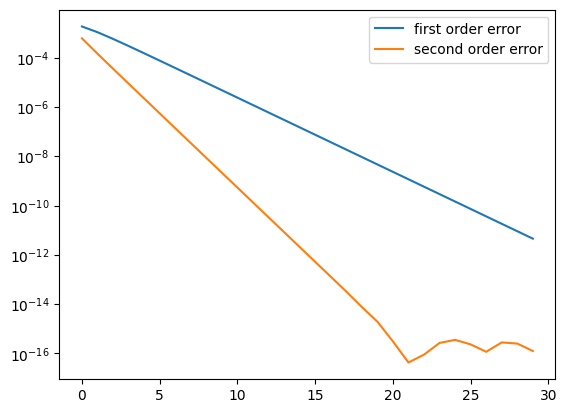

Residual Network Gradient Test:


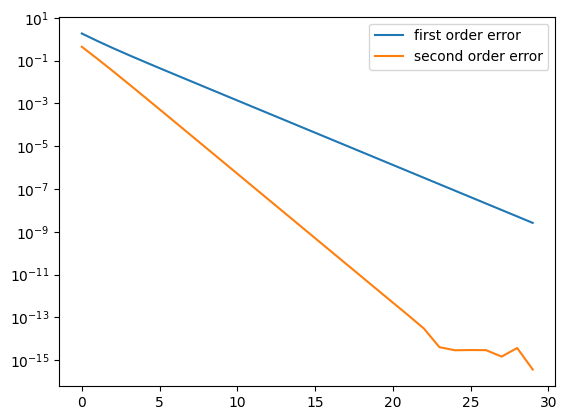

In [ ]:
N = GenericNetwork(
                   layers=[
                            TanhLayer(2, 32), 
                            TanhLayer(32, 32),
                            TanhLayer(32, 2),
                        ],
                    output_layer= SoftmaxLayer(2, 4),
                )

x = np.random.rand(2, 1)
y = np.array([[0, 0, 1, 0]]).T

print("Simple Network Gradient Test:")
NetworkGradientTest(N, x, y)

RN = ResidualNeuralNetwork(
                     layers=[
                             ResidualTanhLayer(2, 32), 
                             ResidualTanhLayer(2, 32),
                             ResidualTanhLayer(2, 2),
                            ],
                      output_layer= SoftmaxLayer(2, 4),
                 )

print("Residual Network Gradient Test:")
NetworkGradientTest(RN, x, y)

### Task 2.2.4

In this task,we train the network for each of the datasets, and we plot the results.
We try 3 different models, all configurations and hyperparameters are available in the [config](config) folder.

We try 3 different network lentgths:
- [2_layers](config/2_layers.json)
- [3_layers](config/3_layers.json)
- [4_layers](config/4_layers.json)

Below we will show the results for each of the datasets


- Dataset: Swiss Roll
- Number of Data Points: 20000

| Metric / Layers       | 2 Layers            | 3 Layers            | 4 Layers            |
|-----------------------|---------------------|---------------------|---------------------|
| Training Accuracy     | 0.94365             | 0.8984              | 0.9191              |
| Validation Accuracy   | 0.9376              | 0.892               | 0.9208              |
| Training Loss         | 0.20301216922496126 | 0.29586865099887627 | 0.37828649936646747 |
| Validation Loss       | 0.21884423348756932 | 0.30416890518650064 | 0.3986264567244625  |



As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:


Epoch 0, training loss: 1.595836700578405
Epoch 0, training accuracy: 0.77285
Epoch 0, validation loss: 1.580549482213196
Epoch 0, validation accuracy: 0.7756
Epoch 1, training loss: 3.8664628124126326
Epoch 1, training accuracy: 0.6104
Epoch 1, validation loss: 3.8474636805845686
Epoch 1, validation accuracy: 0.617
Epoch 2, training loss: 0.5818379553736531
Epoch 2, training accuracy: 0.91405
Epoch 2, validation loss: 0.5807640141207331
Epoch 2, validation accuracy: 0.9124
Epoch 3, training loss: 0.7030353448379687
Epoch 3, training accuracy: 0.89845
Epoch 3, validation loss: 0.8010228514715398
Epoch 3, validation accuracy: 0.895
Epoch 4, training loss: 0.65316992457221
Epoch 4, training accuracy: 0.91195
Epoch 4, validation loss: 0.678769165730853
Epoch 4, validation accuracy: 0.907
Epoch 5, training loss: 0.5080827730307914
Epoch 5, training accuracy: 0.9457
Epoch 5, validation loss: 0.5627100360227477
Epoch 5, validation accuracy: 0.9428
Epoch 6, training loss: 0.537847166027707
Ep

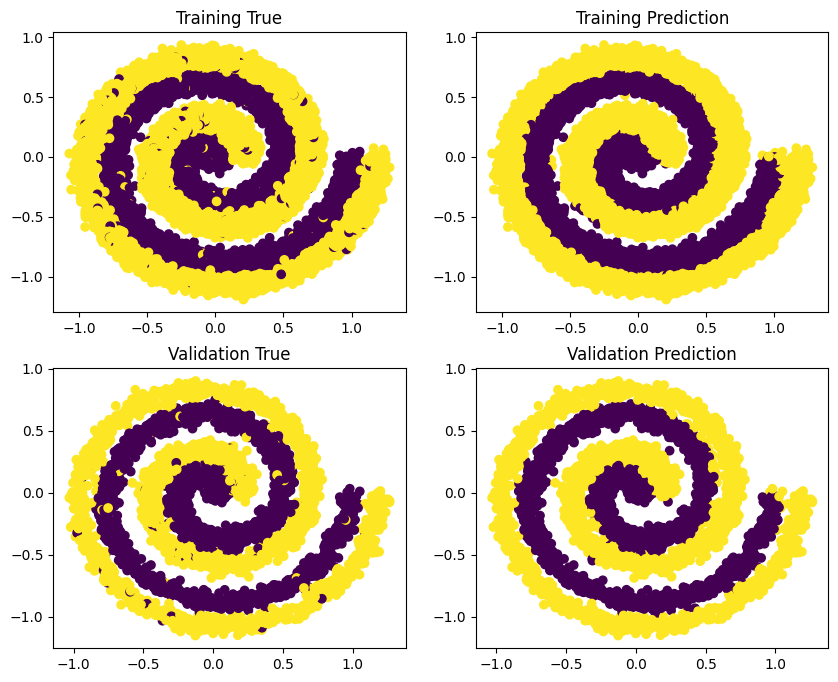

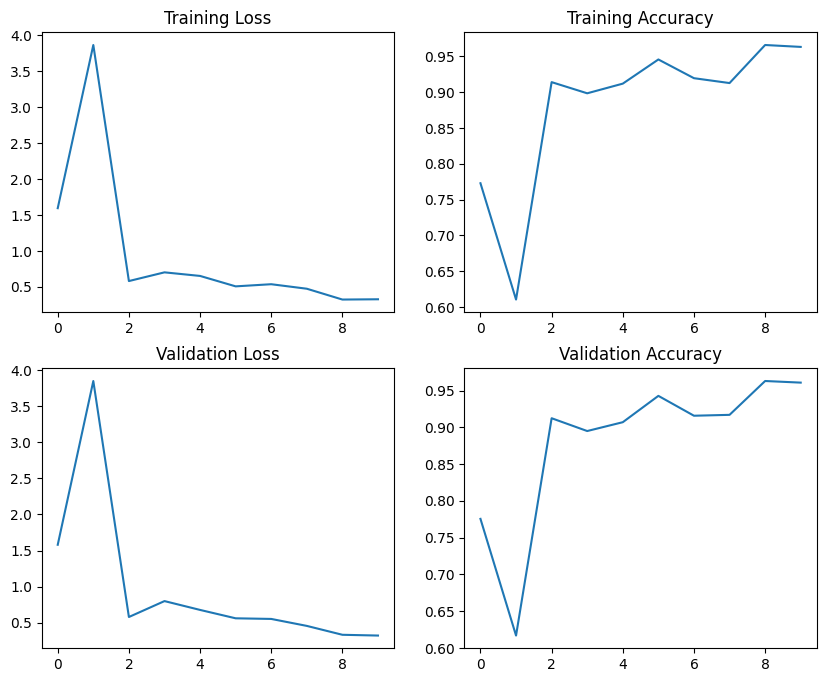

In [22]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 1e-2

network = GenericNetwork(
                        hidden_layers=[
                                ReLULayer(2, 256), 
                                ReLULayer(256, 1024),
                                ],
                        output_layer= SoftmaxLayer(1024, 2),
                        )
# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=10, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)


- Dataset: Peaks
- Number of Data Points: 20000

| Metric / Layers       | 2 Layers           | 3 Layers           | 4 Layers           |
|-----------------------|--------------------|--------------------|--------------------|
| Training Accuracy     | 0.89332            | 0.87676            | 0.83816            |
| Validation Accuracy   | 0.89808            | 0.872              | 0.83504            |
| Training Loss         | 0.5122348502141716 | 0.44620290458756257| 1.4503264029257759 |
| Validation Loss       | 0.540490476298872  | 0.46816340180103966| 1.4641262675102498 |


As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:

Epoch 0, training loss: nan
Epoch 0, training accuracy: 0.75796
Epoch 0, validation loss: nan
Epoch 0, validation accuracy: 0.7584
Epoch 1, training loss: nan
Epoch 1, training accuracy: 0.85092
Epoch 1, validation loss: nan
Epoch 1, validation accuracy: 0.85072
Epoch 2, training loss: nan
Epoch 2, training accuracy: 0.90668
Epoch 2, validation loss: nan
Epoch 2, validation accuracy: 0.90416
Epoch 3, training loss: nan
Epoch 3, training accuracy: 0.90044
Epoch 3, validation loss: nan
Epoch 3, validation accuracy: 0.89344
Epoch 4, training loss: nan
Epoch 4, training accuracy: 0.80332
Epoch 4, validation loss: nan
Epoch 4, validation accuracy: 0.80016
Epoch 5, training loss: nan
Epoch 5, training accuracy: 0.83772
Epoch 5, validation loss: nan
Epoch 5, validation accuracy: 0.83536
Epoch 6, training loss: nan
Epoch 6, training accuracy: 0.89856
Epoch 6, validation loss: nan
Epoch 6, validation accuracy: 0.89712
Epoch 7, training loss: nan
Epoch 7, training accuracy: 0.87732
Epoch 7, vali

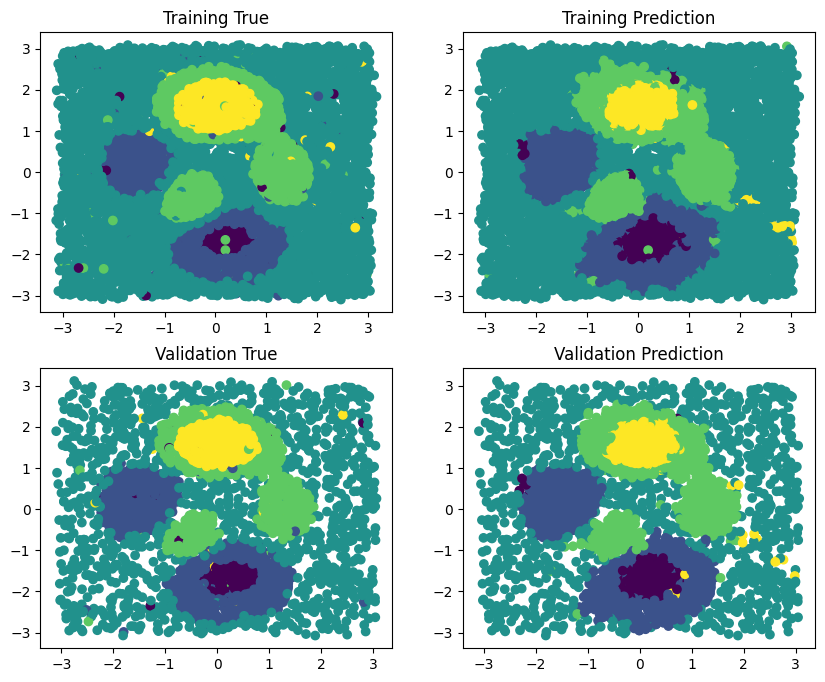

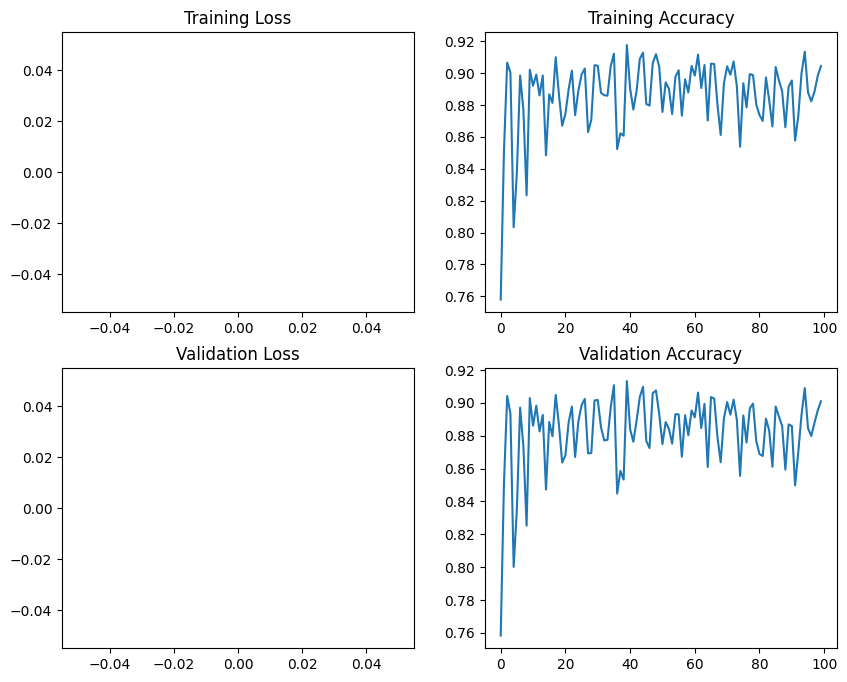

In [23]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
hidden_layers = [
    ReLULayer(2, 32),
    ReLULayer(32, 64),
    ReLULayer(64, 256),
    ReLULayer(256, 1024),
],
output_layer= SoftmaxLayer(1024, 5)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=100, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

Dataset: GMM
Number of Data Points: 20000

| Metric / Layers       | 2 Layers            | 3 Layers            | 4 Layers            |
|-----------------------|---------------------|---------------------|---------------------|
| Training Accuracy     | 0.94728             | 0.92508             | 0.92828             |
| Validation Accuracy   | 0.94704             | 0.9272              | 0.92144             |
| Training Loss         | 0.6301682244524287  | 0.3334058970901822  | 1.0847327222795131  |
| Validation Loss       | 0.6695501061879962  | 0.3562195353418591  | 1.1329189900619603  |

As we can see, the netowrk that preformed the best is the 2 layers network.

We Show the results of the best run below:


In [21]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
hidden_layers = [
    ReLULayer(5, 32),
    ReLULayer(32, 64),
    ReLULayer(64, 256),
    ReLULayer(256, 1024),
],
output_layer= SoftmaxLayer(1024, 5)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=100, batch_size=64)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

Epoch 0, training loss: nan
Epoch 0, training accuracy: 0.9064
Epoch 0, validation loss: nan
Epoch 0, validation accuracy: 0.90848
Epoch 1, training loss: nan
Epoch 1, training accuracy: 0.93276
Epoch 1, validation loss: nan
Epoch 1, validation accuracy: 0.93104
Epoch 2, training loss: nan
Epoch 2, training accuracy: 0.93644
Epoch 2, validation loss: nan
Epoch 2, validation accuracy: 0.93584
Epoch 3, training loss: nan
Epoch 3, training accuracy: 0.9472
Epoch 3, validation loss: nan
Epoch 3, validation accuracy: 0.9456
Epoch 4, training loss: nan
Epoch 4, training accuracy: 0.94916
Epoch 4, validation loss: nan
Epoch 4, validation accuracy: 0.94848
Epoch 5, training loss: nan
Epoch 5, training accuracy: 0.95248
Epoch 5, validation loss: nan
Epoch 5, validation accuracy: 0.95056
Epoch 6, training loss: nan
Epoch 6, training accuracy: 0.94472
Epoch 6, validation loss: nan
Epoch 6, validation accuracy: 0.94416
Epoch 7, training loss: nan
Epoch 7, training accuracy: 0.94032
Epoch 7, valida

### Task 2.2.5
In this part, we are asked to train again, only this time using only 200 data points.
We will use the same configurations as before.

| Metric / Layers       | 2 Layers            | 3 Layers            | 4 Layers             |
|-----------------------|---------------------|---------------------|----------------------|
| Training Accuracy     | 0.685               | 0.585               | 0.705                |
| Validation Accuracy   | 0.6102              | 0.5664              | 0.644                |
| Training Loss         | 3.1438688684219382  | 2.1853793831128066  | 7.714172244143783    |
| Validation Loss       | 4.812293397716229   | 2.343307685834269   | 11.387548453792146   |

As we can see here, non of the networks preformed well, but the 4 layers network preformed the best.

Epoch 0, training loss: nan
Epoch 0, training accuracy: 0.61
Epoch 0, validation loss: nan
Epoch 0, validation accuracy: 0.5258
Epoch 1, training loss: nan
Epoch 1, training accuracy: 0.635
Epoch 1, validation loss: nan
Epoch 1, validation accuracy: 0.5314
Epoch 2, training loss: nan
Epoch 2, training accuracy: 0.63
Epoch 2, validation loss: nan
Epoch 2, validation accuracy: 0.5258
Epoch 3, training loss: nan
Epoch 3, training accuracy: 0.645
Epoch 3, validation loss: nan
Epoch 3, validation accuracy: 0.5654
Epoch 4, training loss: nan
Epoch 4, training accuracy: 0.665
Epoch 4, validation loss: nan
Epoch 4, validation accuracy: 0.555
Epoch 5, training loss: nan
Epoch 5, training accuracy: 0.56
Epoch 5, validation loss: nan
Epoch 5, validation accuracy: 0.557
Epoch 6, training loss: nan
Epoch 6, training accuracy: 0.735
Epoch 6, validation loss: nan
Epoch 6, validation accuracy: 0.6186
Epoch 7, training loss: nan
Epoch 7, training accuracy: 0.695
Epoch 7, validation loss: nan
Epoch 7, v

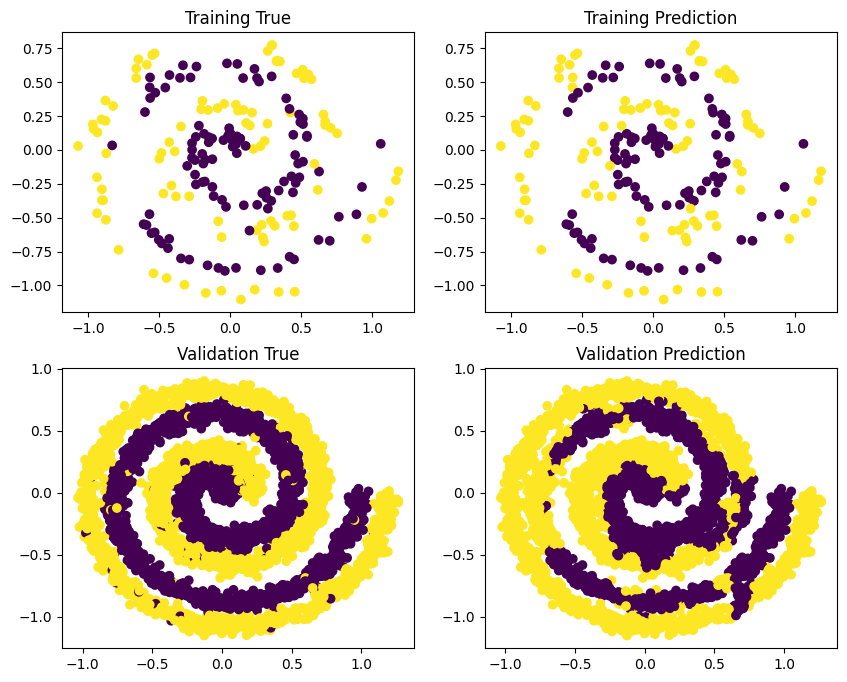

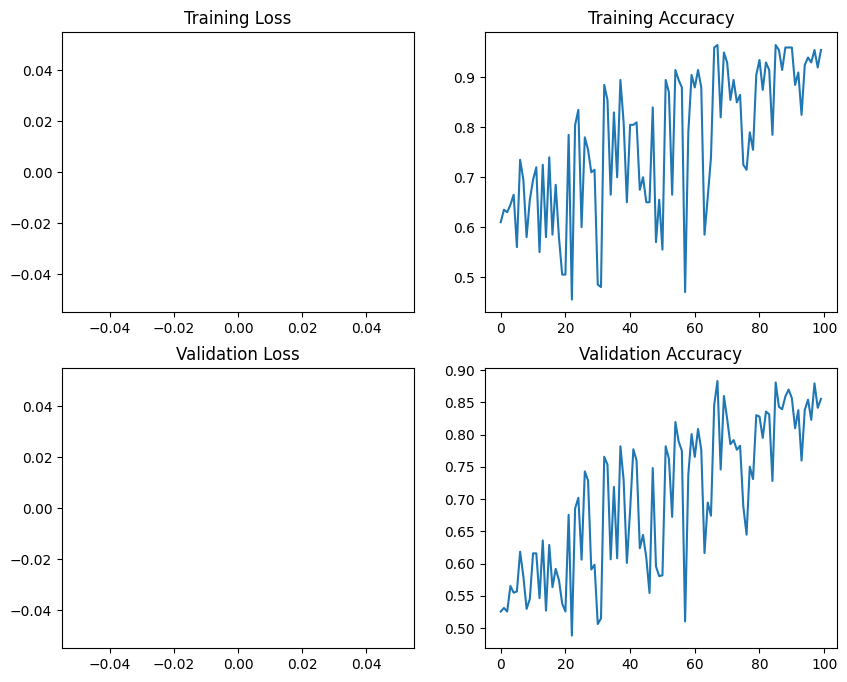

In [18]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
random_columns = np.random.choice(Xt.shape[1], 200, replace=False)
Xt = Xt[:, random_columns]
Yt = Yt[:, random_columns]
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
hidden_layers = [
    ReLULayer(2, 32),
    ReLULayer(32, 64),
    ReLULayer(64, 256),
    ReLULayer(256, 1024),
],
output_layer= SoftmaxLayer(1024, 2)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=100, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

Epoch 0, training loss: nan
Epoch 0, training accuracy: 0.27
Epoch 0, validation loss: nan
Epoch 0, validation accuracy: 0.28592
Epoch 1, training loss: nan
Epoch 1, training accuracy: 0.29
Epoch 1, validation loss: nan
Epoch 1, validation accuracy: 0.30304
Epoch 2, training loss: 94.9087707119148
Epoch 2, training accuracy: 0.305
Epoch 2, validation loss: nan
Epoch 2, validation accuracy: 0.32272
Epoch 3, training loss: 82.27221626340248
Epoch 3, training accuracy: 0.305
Epoch 3, validation loss: 70.79767516252295
Epoch 3, validation accuracy: 0.3312
Epoch 4, training loss: 69.84616697827605
Epoch 4, training accuracy: 0.325
Epoch 4, validation loss: 60.28831115829736
Epoch 4, validation accuracy: 0.35872
Epoch 5, training loss: 58.57542206182003
Epoch 5, training accuracy: 0.395
Epoch 5, validation loss: 51.06129539817952
Epoch 5, validation accuracy: 0.39888
Epoch 6, training loss: 51.82660610168107
Epoch 6, training accuracy: 0.395
Epoch 6, validation loss: 45.25757661921728
Epoch 

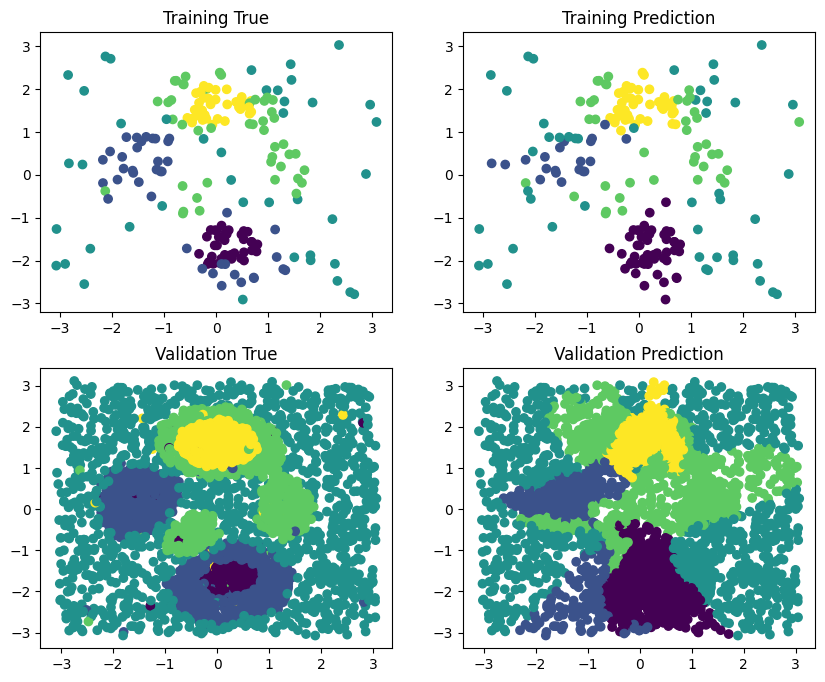

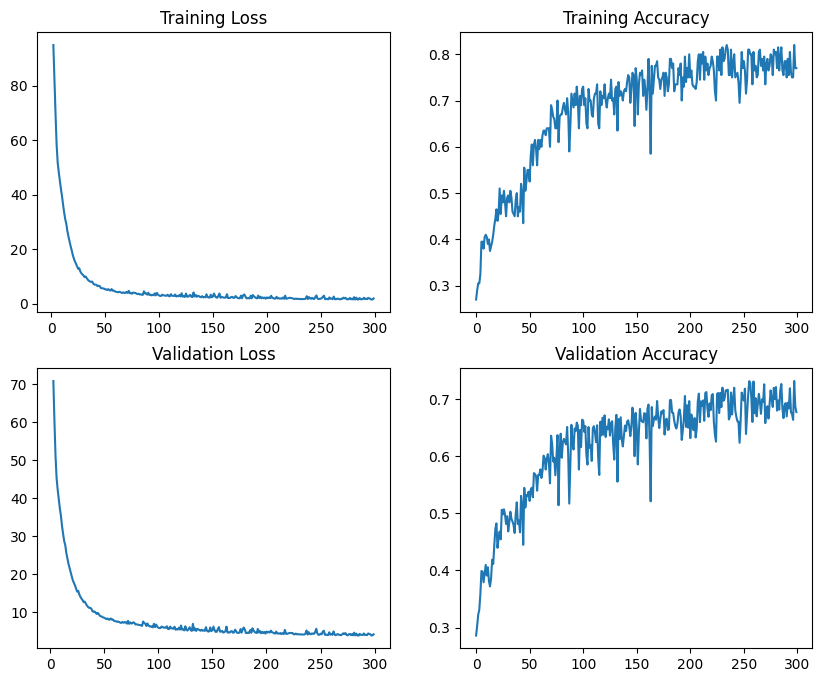

In [28]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']


# sample 200 indecies of columns of Xt
random_columns = np.random.choice(Xt.shape[1], 200, replace=False)
Xt = Xt[:, random_columns]
Yt = Yt[:, random_columns]
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
hidden_layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

In [30]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']

# sample 200 indecies of columns of Xt
random_columns = np.random.choice(Xt.shape[1], 200, replace=False)
Xt = Xt[:, random_columns]
Yt = Yt[:, random_columns]
Xv = dataset['Yv']
Yv = dataset['Cv']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
hidden_layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 123.49511303839212
Epoch 0, training accuracy: 0.2
Epoch 0, validation loss: 129.9218747656283
Epoch 0, validation accuracy: 0.20832
Epoch 1, training loss: 106.34646967563636
Epoch 1, training accuracy: 0.18
Epoch 1, validation loss: 113.01494302990744
Epoch 1, validation accuracy: 0.2104
Epoch 2, training loss: 91.19024756686485
Epoch 2, training accuracy: 0.19
Epoch 2, validation loss: 98.45317904032939
Epoch 2, validation accuracy: 0.20416
Epoch 3, training loss: 77.66644585236305
Epoch 3, training accuracy: 0.19
Epoch 3, validation loss: 85.69504352993906
Epoch 3, validation accuracy: 0.1976
Epoch 4, training loss: 65.8018996381972
Epoch 4, training accuracy: 0.2
Epoch 4, validation loss: 74.53314354295091
Epoch 4, validation accuracy: 0.2024
Epoch 5, training loss: 56.108800146566466
Epoch 5, training accuracy: 0.215
Epoch 5, validation loss: 65.36136833593561
Epoch 5, validation accuracy: 0.21536
Epoch 6, training loss: 49.12556228983367
Epoch 6, training